# Datenanalyse mit KI & Machine Learning
## Decision Trees und Random Forest

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [121]:
# Schwertlilien-Datensatz laden:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


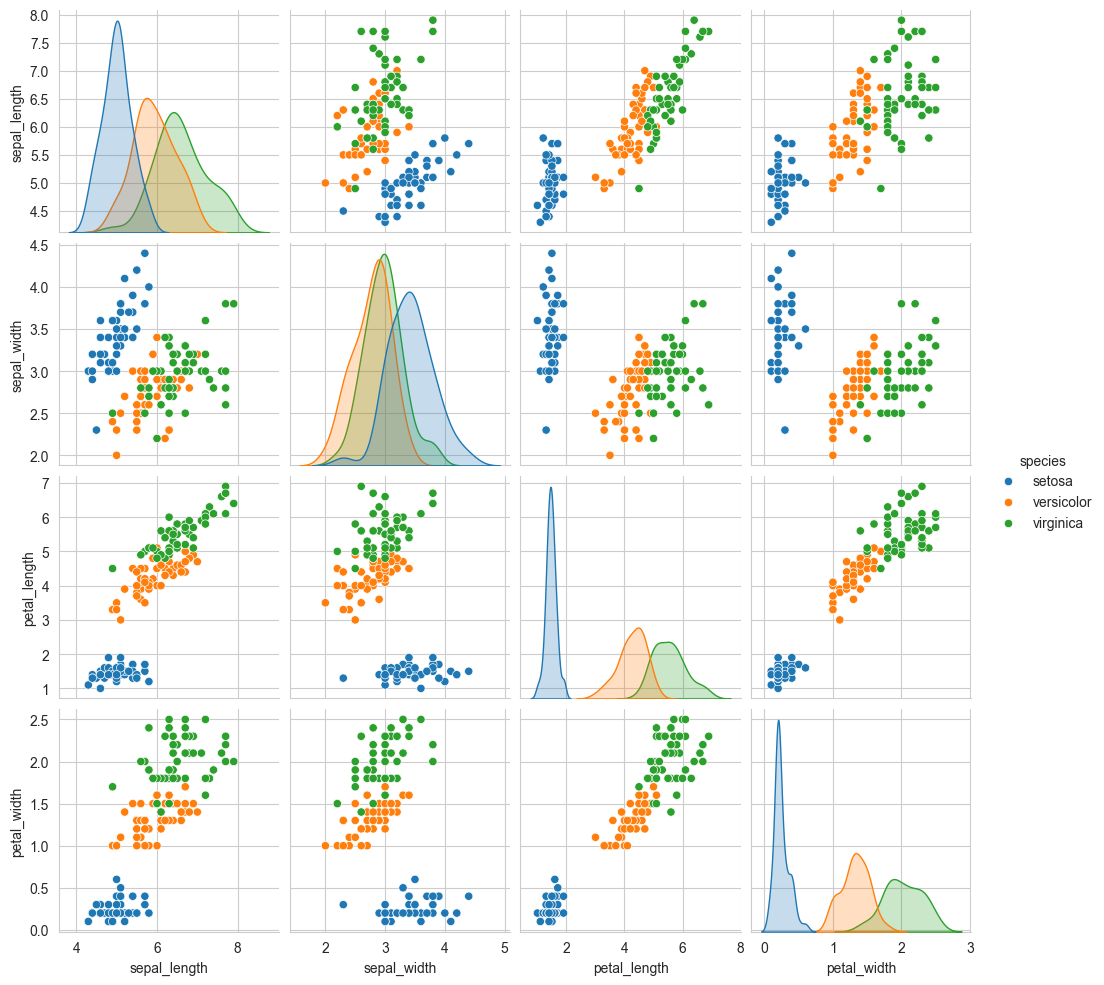

In [122]:
sns.pairplot(iris, hue='species')
plt.show()

In [123]:
# Features und Zielvariable:
X = iris.drop('species', axis=1)
y = iris['species']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
													random_state=1)

In [125]:
y_train.value_counts()

species
virginica     44
setosa        39
versicolor    37
Name: count, dtype: int64

# Decision Trees

Vereinfachte Beispiele für einen Entscheidungsbaum:
* https://miro.medium.com/v2/resize:fit:828/format:webp/0*zT1JQss0oGTkTYzD.png
* https://d14b9ctw0m6fid.cloudfront.net/ugblog/wp-content/uploads/2020/12/17a.png

Ein Entscheidungsbaum ist eine Abfolge von if/else-Statements,
die der Algorithmus an unsere Daten (anhand gewisser Spalten) stellt.
Mit jeder dieser Fragen versucht er, die Daten in einem Bereich
maximal nach den unterschiedlichen darin vorkommenden Klassen zu trennen
Je mehr solcher "Fragen" der Baum stellt, über eine desto höhere Tiefe (depth) verfügt er.
Die Endpunkte dieser Fragen nennen sich Blätter (leafs) und dort finden sich nur noch
Vertreter von einer Klasse vor (100% Reinheit, purity), sofern wir die Äste nicht
künstlich vorher stutzen (pruning)! (Nötig bei Overfitting!)

In [126]:
# Baum-Modell aufstellen:
model = DecisionTreeClassifier(random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [127]:
# Modell trainieren:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [128]:
# Modellgüte prüfen:
model.score(X_test, y_test)

0.9666666666666667

In [129]:
model.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

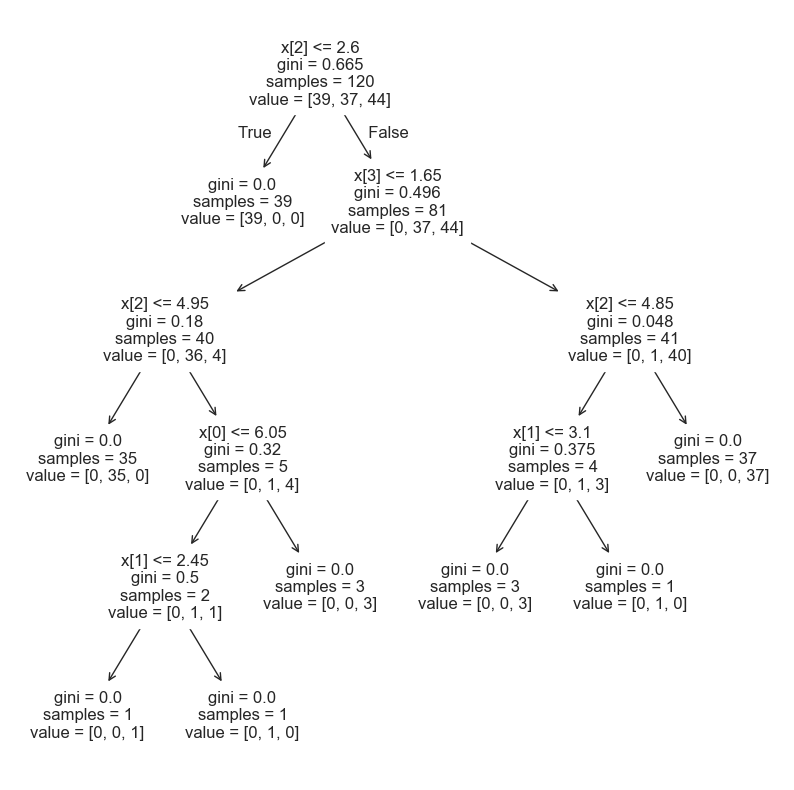

In [130]:
# Entscheidungsbaum darstellen:
plt.figure(figsize=(10, 10))
plot_tree(model)
plt.show()

In [131]:
# Wofür steht Gini?

# Wofür steht samples?

# Wofür steht value?



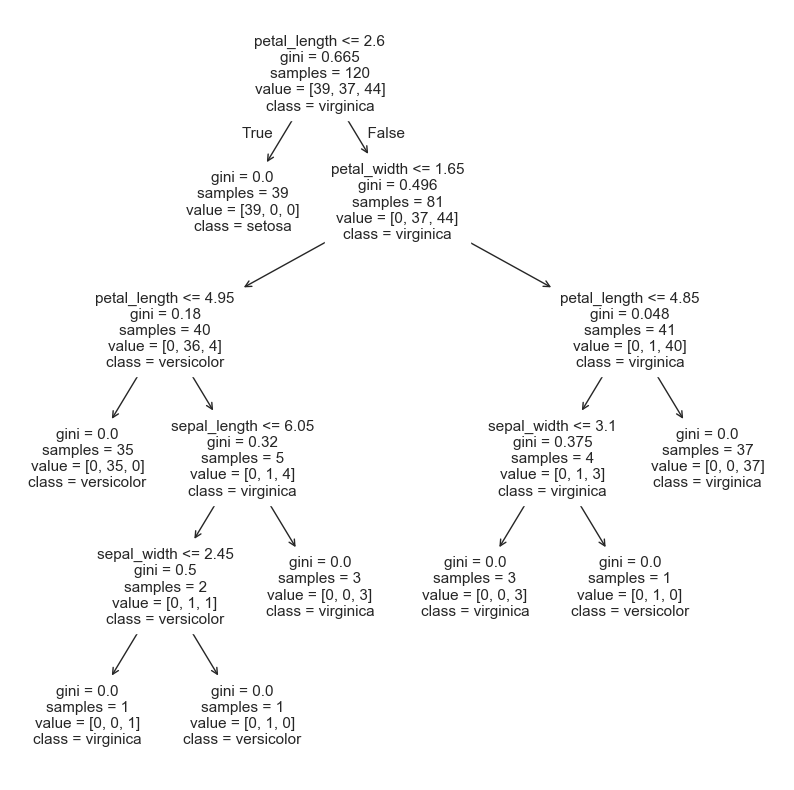

In [132]:
# Entscheidungsbaum darstellen:

class_names = sorted(y_train.unique())

plt.figure(figsize=(10, 10))
plot_tree(
	model,
	feature_names=model.feature_names_in_,
	class_names=class_names
)
plt.show()

In [133]:
# Exkurs: Blatt-Überprüfung mit Pandas-Mitteln:

In [134]:
setosa_split = X_train[X_train['petal_length'] <= 2.6]
setosa_split

,sepal_length,sepal_width,petal_length,petal_width
48,5.3,3.7,1.5,0.2
28,5.2,3.4,1.4,0.2
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1


In [135]:
len(setosa_split)

39

In [136]:
setosa_indices = X_train[X_train['petal_length'] <= 2.6].index
setosa_indices

Index([48, 28, 17, 18,  4, 45, 39, 36, 11, 12,  2,  6, 46, 10, 34, 32, 38, 27,
       23,  9, 15, 41, 26, 43, 24, 49, 21,  3, 30, 47, 13,  8,  0,  1, 22,  7,
       20, 25, 37],
      dtype='int64')

In [137]:
y_train.index

Index([ 91, 135,  69, 128, 114,  48,  53,  28,  54, 108,
       ...
        25, 134,  71, 129,  79, 133, 137,  72, 140,  37],
      dtype='int64', length=120)

In [138]:
y_train[y_train.index.isin(setosa_indices)]

48    setosa
28    setosa
17    setosa
18    setosa
4     setosa
45    setosa
39    setosa
36    setosa
11    setosa
12    setosa
2     setosa
6     setosa
46    setosa
10    setosa
34    setosa
32    setosa
38    setosa
27    setosa
23    setosa
9     setosa
15    setosa
41    setosa
26    setosa
43    setosa
24    setosa
49    setosa
21    setosa
3     setosa
30    setosa
47    setosa
13    setosa
8     setosa
0     setosa
1     setosa
22    setosa
7     setosa
20    setosa
25    setosa
37    setosa
Name: species, dtype: object

In [139]:
y_train[y_train.index.isin(setosa_indices)].value_counts()

species
setosa    39
Name: count, dtype: int64

In [140]:
# Exkurs Ende.

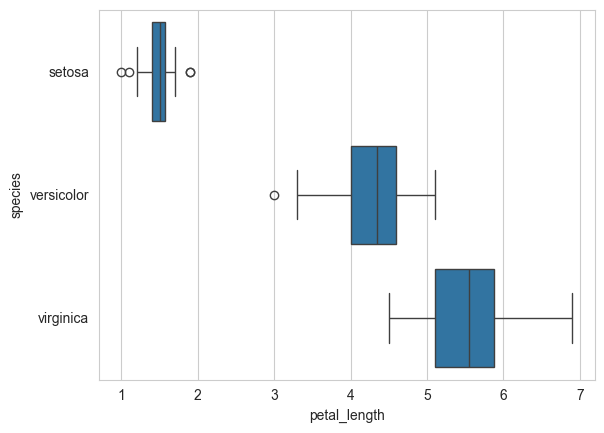

In [141]:
# Überprüfung des ersten Knotenpunkts -> Warum wird genau dieser Trennwert gewählt?
sns.boxplot(data=iris, x="petal_length", y="species")
plt.show()

In [142]:
model.feature_importances_

array([0.00752037, 0.03133487, 0.57201197, 0.38913279])

In [143]:
model.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [144]:
# Verringerung der Tiefe bringt keine positiven Effekte:
model_with_depth = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
model_with_depth.score(X_test, y_test)

0.5666666666666667

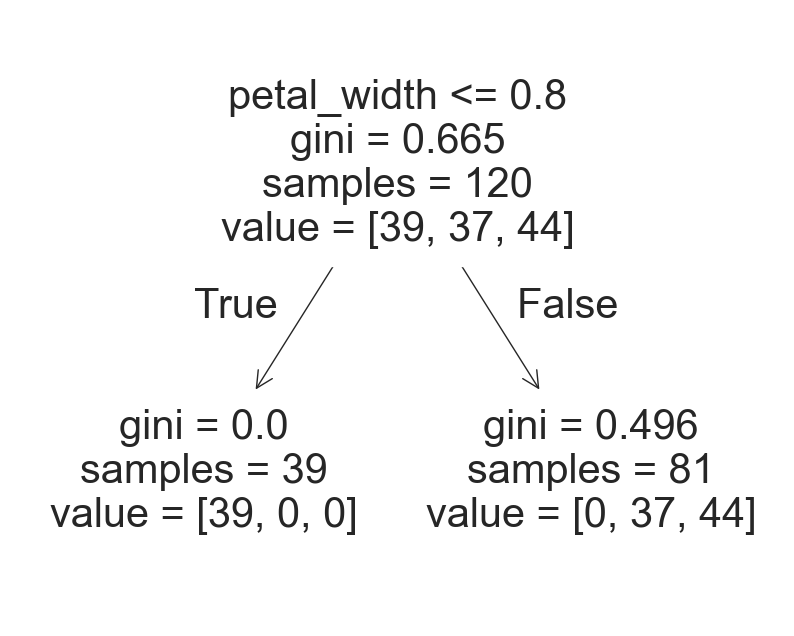

In [145]:
plt.figure(figsize=(10, 8))
plot_tree(model_with_depth, feature_names=model_with_depth.feature_names_in_)
plt.show()

In [146]:
# Beispiel, wo geringere Tiefe das Resultat verbessert!

In [147]:
cancer = load_breast_cancer()

In [148]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [149]:
np.unique(cancer.target)

array([0, 1])

In [150]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [151]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,
													y,
													test_size=0.2,
													random_state=42,
													stratify=y)

In [152]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)

DecisionTreeClassifier()

In [153]:
# overfitting
tree1.score(X_train, y_train)

1.0

In [154]:
tree1.score(X_test, y_test)

0.9122807017543859

In [155]:
# Mit maximaler Tiefe von 4:

In [156]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [157]:
# no overfitting
tree2.score(X_train, y_train)

0.9868131868131869

In [158]:
tree2.score(X_test, y_test)

0.9385964912280702

In [159]:
for depth in range(1, 5):
	tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
	tree.fit(X_train, y_train)
	print(tree.score(X_test, y_test))

0.9210526315789473
0.8947368421052632
0.9385964912280702
0.9385964912280702


# Random Forest

Als Random Forest werden Modelle bezeichnet, die eine Vielzahl an Entscheidungsbäumen gleichzeitig verwenden, um Vorhersagen zu treffen.<br><br> 
Dafür werden Decision Trees wachsen gelassen, die nach verschiedenen Prinzipien ihre "Fragen" an die Daten stellen (beim Start spielt Zufall eine Rolle, darum RANDOM Forest).
<br><br>
Genauer genommen werden Stichproben (bootstrap samples) aus dem Datensatz so oft gezogen, bis die Größe des ursprünglichen Datensatzes erreicht ist und an solchen, immer etwas unterschiedlichen Datensätzen, üben sich die Bäume. Außerdem wählen sie an jeder Verästelung (Node) zufällig immer nur einen Teil der verfügbaren Variablen und versuchen dann aus diesem Subset die sinnvollste Variabel für den nächsten Split zu ermitteln.<br><br> 
Aus den so entstandenen vielen Bäumen wird dann ein einziger Baum gebildet, in den die Entscheidungen einfließen, die statistisch am häufigsten getroffen wurden. Man könnte sagen, dass aus dem Random Forest ein "Durchschnittsbaum" gebildet wird.

In [160]:
# Features und Zielvariabel zuordnen
X = iris.drop("species", axis=1)
y = iris["species"]

In [173]:
# Daten splitten
X_train, X_test, y_train, y_test = train_test_split(X,
													y,
													test_size=0.2,
													random_state=42)

In [174]:
# Ein Wald mit 100 Bäumen:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [175]:
model_rf.score(X_train, y_train)

1.0

In [176]:
model_rf.score(X_test, y_test)

0.9649122807017544

In [164]:
# Verbessert Random Forest das Ergebnis beim Cancer-Dataset?

In [182]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
													random_state=42,
													stratify=y)

In [183]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [184]:
rf.score(X_train, y_train)

1.0

In [186]:
rf.score(X_test, y_test)

0.9473684210526315

In [187]:
y_pred = rf.predict(X_test)

In [188]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [189]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

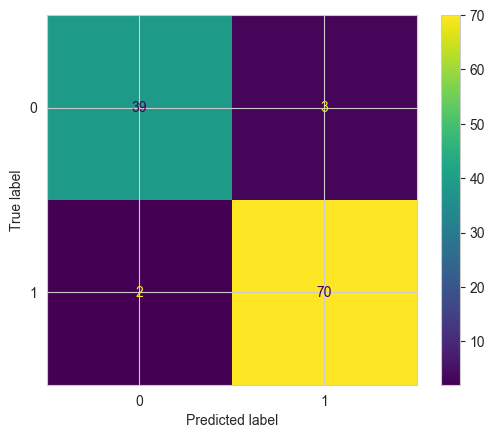

In [171]:
ConfusionMatrixDisplay.from_predictions(
	y_true=y_test,
	y_pred=y_pred,
)
plt.show()

# Übungsaufgabe:
### Erstelle einen Entscheidungsbaum, welcher die Inselzugehörigkeit der Pinguine anhand der 4 numerischen Variablen des Datensatzes vorhersagt. Stelle den Baum am Ende graphisch dar. Stutze ihn danach und schaue, ob es das Ergebnis verbessert. Zu guter Letzt versuche das Ganze erneut mit einem RandomForest.

In [234]:
# Load data
pengu = sns.load_dataset("penguins")
pengu

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


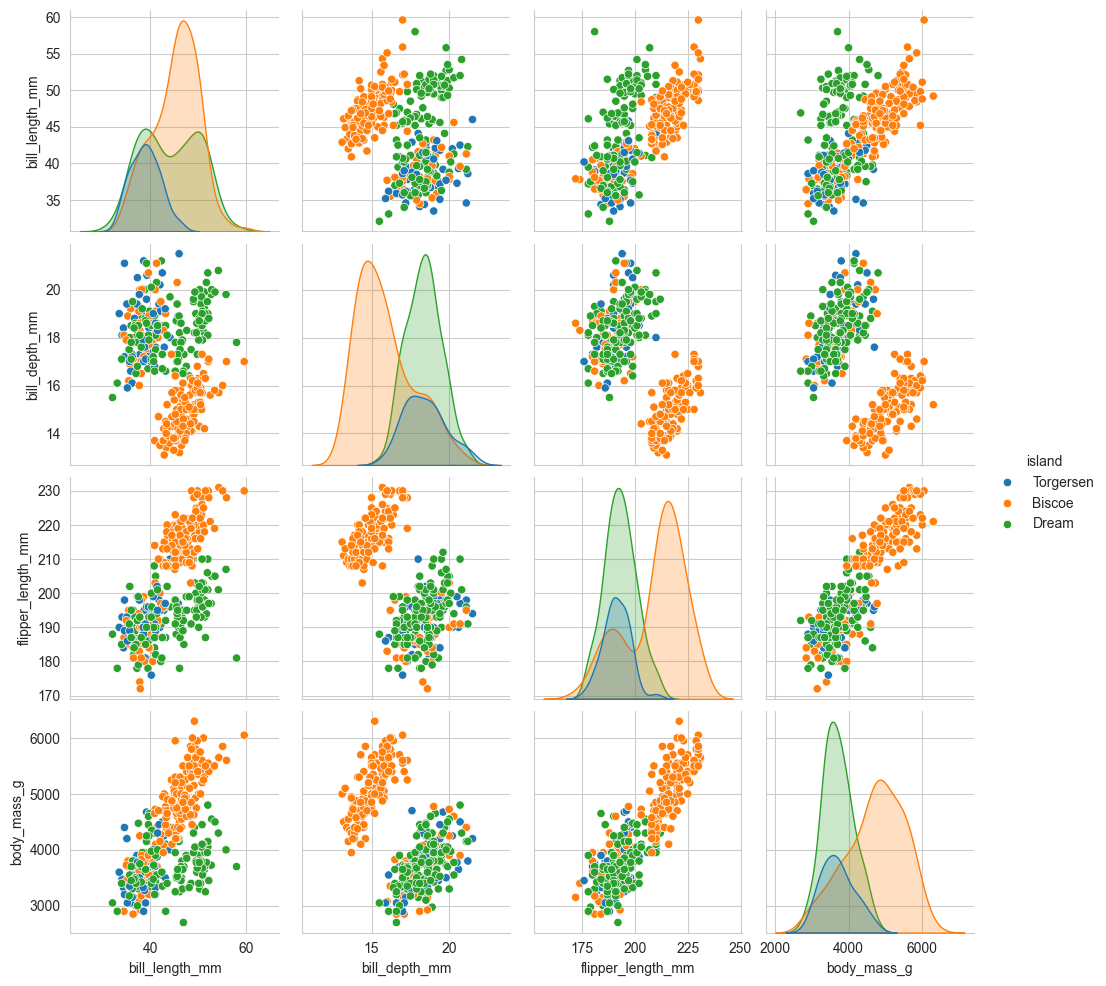

In [235]:
sns.pairplot(pengu, hue='island')
plt.show()

In [236]:
# NaN's ?
pengu.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [237]:
# Drop NaN's
pengu.dropna(inplace=True)

In [238]:
# NaN's ?
pengu.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [239]:
# Features & Target (X & y)
X = pengu.select_dtypes("number")
y = pengu["island"]

In [240]:
# Features
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [241]:
# Target
y

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 333, dtype: object

In [242]:
# TrainTestSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
													random_state=42)

In [243]:
# take a look @ Target
pengu_target = y_train.value_counts()
pengu_target

island
Biscoe       130
Dream        103
Torgersen     33
Name: count, dtype: int64

In [244]:
# take a look @ Target % Distribution
y_train.value_counts(normalize=True)

island
Biscoe       0.488722
Dream        0.387218
Torgersen    0.124060
Name: proportion, dtype: float64

In [245]:
# DecisionTree Model
island_dt = DecisionTreeClassifier(random_state=42)
island_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [246]:
# fitting Model
island_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [247]:
# checking Score
print("Train-Score:", island_dt.score(X_train, y_train))
print("Test-Score: ", island_dt.score(X_test, y_test))

Train-Score: 1.0
Test-Score:  0.6268656716417911


In [218]:
# take a look @ Feature-Names
pengu_features = island_dt.feature_names_in_
print(f"🐧 Feature-Names: {pengu_features}")

🐧 Feature-Names: ['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'body_mass_g']


In [219]:
# take a look @ Class-Names
pengu_classes = sorted(y_train.unique())
print(f"🐧 Class-Names: {pengu_classes}")

🐧 Class-Names: ['Biscoe', 'Dream', 'Torgersen']


In [ ]:
# DecisionTree
plt.figure(figsize=(100, 100))
plot_tree(
	island_dt,
	feature_names=pengu_features,
	class_names=pengu_classes
)
plt.show()

In [252]:
island_dt.feature_importances_

array([0.26749169, 0.46193628, 0.09172419, 0.17884784])

In [253]:
pengu_features

array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'], dtype=object)